# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import json

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

 #Output File (CSV)
df = pd.read_csv("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

## Generate Cities List

In [59]:
base_url="https://api.openweathermap.org/data/2.5/weather?"
units="imperial"
weather_key="d51879dc8581dbf6ee43ee85a3a06d04"
city="kansas city"
#building query
query_url= f"{base_url}appid={weather_key}&units={units}&q="
query_url

'https://api.openweathermap.org/data/2.5/weather?appid=d51879dc8581dbf6ee43ee85a3a06d04&units=imperial&q='

In [7]:
weather_json=requests.get(query_url+city)
weather_response=weather_json.json()
weather_response

{'coord': {'lon': -94.58, 'lat': 39.1},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'},
  {'id': 200,
   'main': 'Thunderstorm',
   'description': 'thunderstorm with light rain',
   'icon': '11d'}],
 'base': 'stations',
 'main': {'temp': 68.25,
  'feels_like': 70.07,
  'temp_min': 66.99,
  'temp_max': 69.8,
  'pressure': 1015,
  'humidity': 88},
 'visibility': 4828,
 'wind': {'speed': 5.82, 'deg': 340},
 'clouds': {'all': 90},
 'dt': 1598708397,
 'sys': {'type': 1,
  'id': 4903,
  'country': 'US',
  'sunrise': 1598701500,
  'sunset': 1598748816},
 'timezone': -18000,
 'id': 4393217,
 'name': 'Kansas City',
 'cod': 200}

In [76]:
# print(cities)

In [78]:
#set up list to hold response info
city_weather = []
counter = 0
#loop through the list of cities and perform a request for weather data for each city
for city in cities:
    
    #gets response for each city
    response = requests.get(query_url + city).json()
    #try/except statement to handle errors when city is not found on openweather site
#     try:
        #create dictionary
    weather_dict = {
            "City":response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
    city_weather.append(weather_dict)
        #counter = counter + 1
    print(response['name'],response['id'])
#     except:
#       print("Missing city...skipping | " + city)


KeyError: 'name'

In [64]:
# city_weather = []
# counter=0

# for city in cities:
   
#     weather=requests.get(query_url+city)
#     weather_json=weather.json()

#     try:
        
        
#         #print(json.dumps(weather_json))
#         city_dict = {
#         "city_name":weather_json["name"],
#         "Lat":weather_json["coord"]["lat"],
#         "Lng":weather_json["coord"]["lon"],
#         "Max_Temp":weather_json["main"]["temp_max"],
#         "Humidity":weather_json["main"]["humidity"],
#         "Wind_Speed":weather_json["wind"]["speed"],
#         "cloudiness": weather_json["clouds"]["all"],
#         "Country":weather_json["sys"]["country"],
#         "Date":weather_json["dt"]
#         }

#         city_weather.append(city_dict)
                
#         counter = counter +1  
#         print(counter,weather_json['name'],weather_json['id'])
        
#     except:
#         print("city not found")

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not f

KeyboardInterrupt: 

In [60]:
# final_url= f"{base_url}appid={weather_key}&units={units}&q="
# final_url

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
# # print( city_weather)
df1=pd.DataFrame(city_weather)
df1.head(20)

""


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
city_df=pd.DataFrame(city_weather)
city_df

,city_name,cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
1,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
2,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
3,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
4,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
...,...,...,...,...,...,...,...,...,...
579,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
580,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
581,City,0,AU,1598726615,81,-35.28,149.13,37,1.99
582,City,0,AU,1598726615,81,-35.28,149.13,37,1.99


In [51]:

city_df.to_csv("cities_1.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
hum1=city_df.loc[city_df["Humidity"]>100]
hum1

,city_name,cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


###  Get the indices of cities that have humidity over 100%.
I found no cities with Humidity >100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

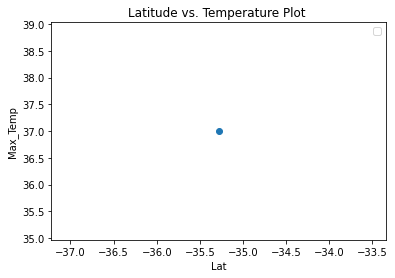

In [53]:
plt.scatter(Lat,Max_Temp)
plt.title("Latitude vs. Temperature Plot ")
plt.legend(loc="best")
plt.xlabel("Lat")
plt.ylabel("Max_Temp")
plt.show

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression